In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")
submission=pd.read_csv("sample_submission.csv")

In [4]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [6]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [20]:
# Decriptive Analytics

In [8]:
train.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')

In [21]:
train.isna().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [22]:
train.dropna(subset = ['Selling_Price'])

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,WATE7VE2D62VEKW8,17.0,2016-03-28 19:55:43.000,24,Marquell,Yes,Technology,0,47,0.0,614.0,10.0,8174.0,11266.0,10277.520192
6364,SHOEF9G8Z4ZXF6WE,21.0,2015-02-11 15:09:26.000,55,Theodore,Yes,Child_care,0,35,0.0,269.0,5.0,3564.0,4920.0,4501.837200
6365,PBXEB9ZQ7HHCFXYG,36.0,2015-11-19 17:29:21.000,358,Galen,No,Repair,3,29,0.0,283.0,3.0,5303.0,14614.0,10218.878775
6366,NKCEAGXHRYTNTMG7,27.0,2015-12-08 04:19:33.000,452,Posey,Yes,Repair,0,8,0.0,267.0,3.0,4334.0,5849.0,5359.493997


In [23]:
train=train.dropna(subset = ['Selling_Price'])

In [24]:
train.isna().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       207
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           198
charges_2 (%)       204
Minimum_price        38
Maximum_price       341
Selling_Price         0
dtype: int64

In [25]:
test.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price'],
      dtype='object')

In [26]:
train.shape,test.shape

((6327, 15), (3430, 14))

In [27]:
data = pd.concat([train,test])

In [28]:
data = data.reset_index().drop(columns="index")

In [29]:
data

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9752,BBAE9K7BXFUTDNBK,9.0,2015-08-15 21:17:17.000,58,Davion,Yes,Pet_care,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN
9753,RTRDYPA4PJHCJCGF,30.0,2015-12-04 01:51:47.000,358,Maiah,Yes,Technology,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN
9754,TUNE8FWQBS7TVVT7,14.0,2016-03-28 20:55:47.000,106,Gwendolen,Yes,Educational,0,36,0.0,150.0,17.0,710.0,10894.0,NaN
9755,NKCEGMUABCRGUZPE,1.0,2015-05-23 07:41:36.000,104,Addilynn,Yes,Child_care,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9757 entries, 0 to 9756
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        9757 non-null   object 
 1   Stall_no          9751 non-null   float64
 2   instock_date      9757 non-null   object 
 3   Market_Category   9757 non-null   int64  
 4   Customer_name     9497 non-null   object 
 5   Loyalty_customer  9757 non-null   object 
 6   Product_Category  9757 non-null   object 
 7   Grade             9757 non-null   int64  
 8   Demand            9757 non-null   int64  
 9   Discount_avail    9720 non-null   float64
 10  charges_1         9523 non-null   float64
 11  charges_2 (%)     9548 non-null   float64
 12  Minimum_price     9705 non-null   float64
 13  Maximum_price     9416 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 1.1+ MB


In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Stall_no,9751.0,25.425187,14.352011,1.00,13.00000,25.00000,38.000000,50.000000
Market_Category,9757.0,198.254279,169.785262,0.00,55.00000,128.00000,389.000000,471.000000
Grade,9757.0,0.652352,1.032715,0.00,0.00000,0.00000,2.000000,3.000000
Demand,9757.0,50.569232,28.917136,1.00,26.00000,50.00000,76.000000,100.000000
Discount_avail,9720.0,0.142284,0.349359,0.00,0.00000,0.00000,0.000000,1.000000
charges_1,9523.0,264.952221,124.808461,100.00,163.00000,252.00000,317.000000,649.000000
charges_2 (%),9548.0,10.254504,4.288896,1.00,7.00000,10.00000,14.000000,17.000000
Minimum_price,9705.0,3502.293251,2188.640210,1.00,1864.00000,3128.00000,4668.000000,17580.000000
Maximum_price,9416.0,6362.493309,3667.385509,163.00,3883.00000,5558.50000,8003.250000,58812.000000
Selling_Price,6327.0,4563.242592,2979.102408,-6062.47,2450.00528,4210.38464,6167.643252,22638.325941


In [32]:
data.isna().sum()

Product_id             0
Stall_no               6
instock_date           0
Market_Category        0
Customer_name        260
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail        37
charges_1            234
charges_2 (%)        209
Minimum_price         52
Maximum_price        341
Selling_Price       3430
dtype: int64

In [33]:
train.isna().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       207
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           198
charges_2 (%)       204
Minimum_price        38
Maximum_price       341
Selling_Price         0
dtype: int64

In [34]:
data.select_dtypes(include=np.number)

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,37.0,2,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,38.0,24,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,9.0,447,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,50.0,23,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,7.0,63,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...
9752,9.0,58,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN
9753,30.0,358,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN
9754,14.0,106,0,36,0.0,150.0,17.0,710.0,10894.0,NaN
9755,1.0,104,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN


In [35]:
numerical_columns=data.select_dtypes(include=np.number).drop(columns=['Selling_Price']).columns

In [36]:
data.select_dtypes(exclude=np.number)

,Product_id,instock_date,Customer_name,Loyalty_customer,Product_Category
0,BRAE2NF6JA5GUEXG,2015-08-22 18:36:12.000,Lillyann,Yes,Fashion
1,TUNE8SFB6RJN2HSD,2016-03-27 21:19:13.000,Klynn,Yes,Fashion
2,BRAEAR7WZPQGPBZU,2015-08-18 19:25:22.000,Ridge,Yes,Child_care
3,WATDZ2ZQ8JPDHCTJ,2016-03-28 21:53:01.000,Abran,Yes,Educational
4,JWSEBUKYQPMBZ3RK,2016-03-29 22:58:53.000,Dustyn,Yes,Repair
...,...,...,...,...,...
9752,BBAE9K7BXFUTDNBK,2015-08-15 21:17:17.000,Davion,Yes,Pet_care
9753,RTRDYPA4PJHCJCGF,2015-12-04 01:51:47.000,Maiah,Yes,Technology
9754,TUNE8FWQBS7TVVT7,2016-03-28 20:55:47.000,Gwendolen,Yes,Educational
9755,NKCEGMUABCRGUZPE,2015-05-23 07:41:36.000,Addilynn,Yes,Child_care


In [39]:
data.select_dtypes(exclude=np.number).drop(columns=['Product_id','instock_date','Customer_name'])

,Loyalty_customer,Product_Category
0,Yes,Fashion
1,Yes,Fashion
2,Yes,Child_care
3,Yes,Educational
4,Yes,Repair
...,...,...
9752,Yes,Pet_care
9753,Yes,Technology
9754,Yes,Educational
9755,Yes,Child_care


In [92]:
category_columns=data.select_dtypes(exclude=np.number).drop(columns=['Product_id','instock_date','Customer_name']).columns

In [93]:
data[category_columns].apply(lambda x: x.nunique())

Loyalty_customer     2
Product_Category    10
dtype: int64

In [42]:
data[category_columns].apply(lambda x: print(x.value_counts()))

Yes    5949
No     3808
Name: Loyalty_customer, dtype: int64
Pet_care       1025
Repair         1011
Child_care     1003
Cosmetics       992
Educational     960
Technology      957
Hospitality     955
Organic         954
Home_decor      951
Fashion         949
Name: Product_Category, dtype: int64


Loyalty_customer    None
Product_Category    None
dtype: object

# EDA

In [43]:
data[numerical_columns].isna().sum()

Stall_no             6
Market_Category      0
Grade                0
Demand               0
Discount_avail      37
charges_1          234
charges_2 (%)      209
Minimum_price       52
Maximum_price      341
dtype: int64

In [44]:
data[category_columns].isna().sum()

Loyalty_customer    0
Product_Category    0
dtype: int64

In [45]:
data.isna().sum()/data.shape[0]

Product_id          0.000000
Stall_no            0.000615
instock_date        0.000000
Market_Category     0.000000
Customer_name       0.026648
Loyalty_customer    0.000000
Product_Category    0.000000
Grade               0.000000
Demand              0.000000
Discount_avail      0.003792
charges_1           0.023983
charges_2 (%)       0.021421
Minimum_price       0.005330
Maximum_price       0.034949
Selling_Price       0.351542
dtype: float64

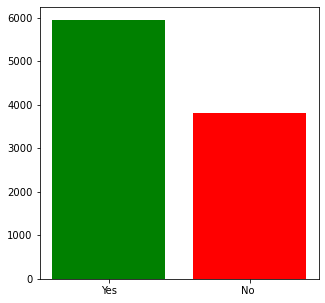

In [47]:
plt.figure(figsize=(5,5))
plt.bar(list(data["Loyalty_customer"].value_counts().keys()),list(data["Loyalty_customer"].value_counts()),color=['g','r'])
plt.show()

<AxesSubplot:ylabel='Product_Category'>

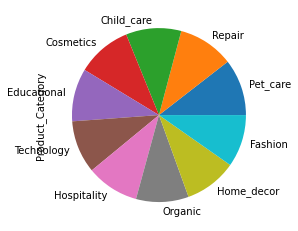

In [48]:
data["Product_Category"].value_counts().plot(kind = "pie")

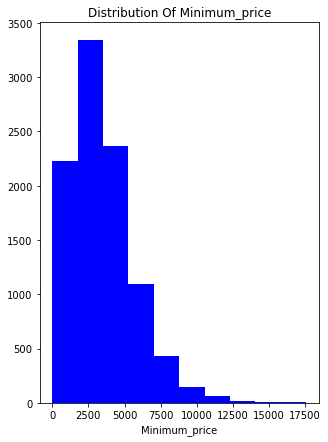

In [49]:
plt.figure(figsize=(5,7))
plt.hist(data["Minimum_price"],color='b')
plt.title("Distribution Of Minimum_price")
plt.xlabel("Minimum_price")
plt.show()

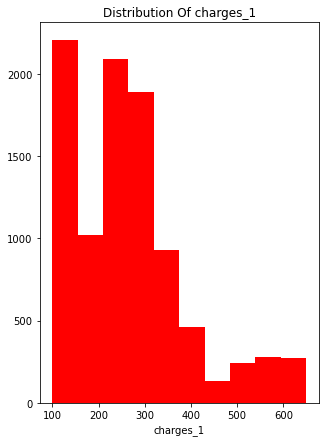

In [52]:
plt.figure(figsize=(5,7))
plt.hist(data["charges_1"],color='r')
plt.title("Distribution Of charges_1")
plt.xlabel("charges_1")
plt.show()

In [55]:
pd.crosstab(data["Loyalty_customer"],data['Grade'])

Grade,0,1,2,3
Loyalty_customer,,,,
No,2660,210,676,262
Yes,4026,369,1014,540


In [56]:
data.corr().T

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Stall_no,1.000000,-0.004047,-0.008713,0.000317,-0.009574,-0.010716,-0.004239,-0.003949,-0.004439,0.011733
Market_Category,-0.004047,1.000000,-0.034151,-0.015518,-0.000215,0.020660,0.016457,0.199884,0.145650,0.138711
Grade,-0.008713,-0.034151,1.000000,0.003397,-0.027969,-0.017184,-0.014640,-0.077175,0.169504,0.086450
Demand,0.000317,-0.015518,0.003397,1.000000,-0.004337,-0.003608,0.013847,-0.008415,-0.012208,-0.000601
Discount_avail,-0.009574,-0.000215,-0.027969,-0.004337,1.000000,-0.002041,0.018585,0.013961,0.002116,-0.512457
charges_1,-0.010716,0.020660,-0.017184,-0.003608,-0.002041,1.000000,0.276583,0.021734,0.019301,0.053045
charges_2 (%),-0.004239,0.016457,-0.014640,0.013847,0.018585,0.276583,1.000000,0.012084,0.009368,0.009031
Minimum_price,-0.003949,0.199884,-0.077175,-0.008415,0.013961,0.021734,0.012084,1.000000,0.719903,0.700444
Maximum_price,-0.004439,0.145650,0.169504,-0.012208,0.002116,0.019301,0.009368,0.719903,1.000000,0.766928
Selling_Price,0.011733,0.138711,0.086450,-0.000601,-0.512457,0.053045,0.009031,0.700444,0.766928,1.000000


<AxesSubplot:>

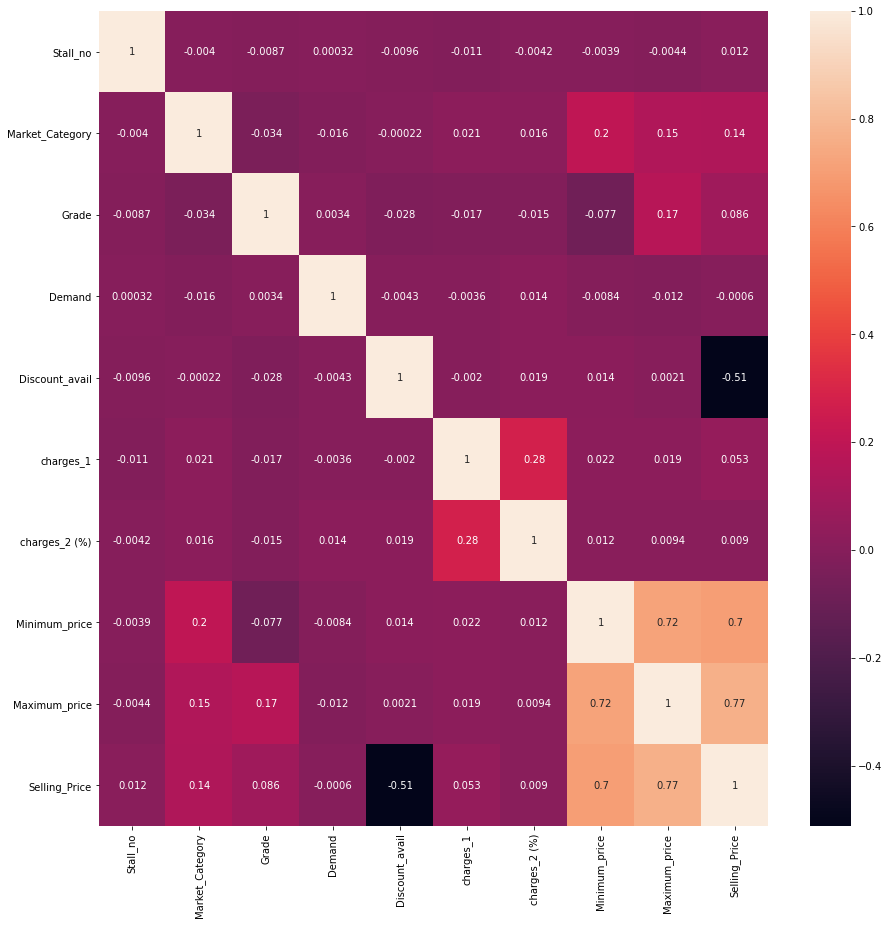

In [57]:
plt.figure(figsize=(15,15))
sbn.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='Loyalty_customer'>

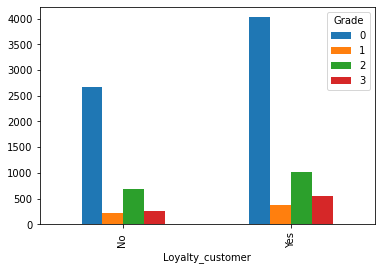

In [58]:
pd.crosstab(data["Loyalty_customer"],data['Grade']).plot(kind = "bar") 

<AxesSubplot:xlabel='Product_Category'>

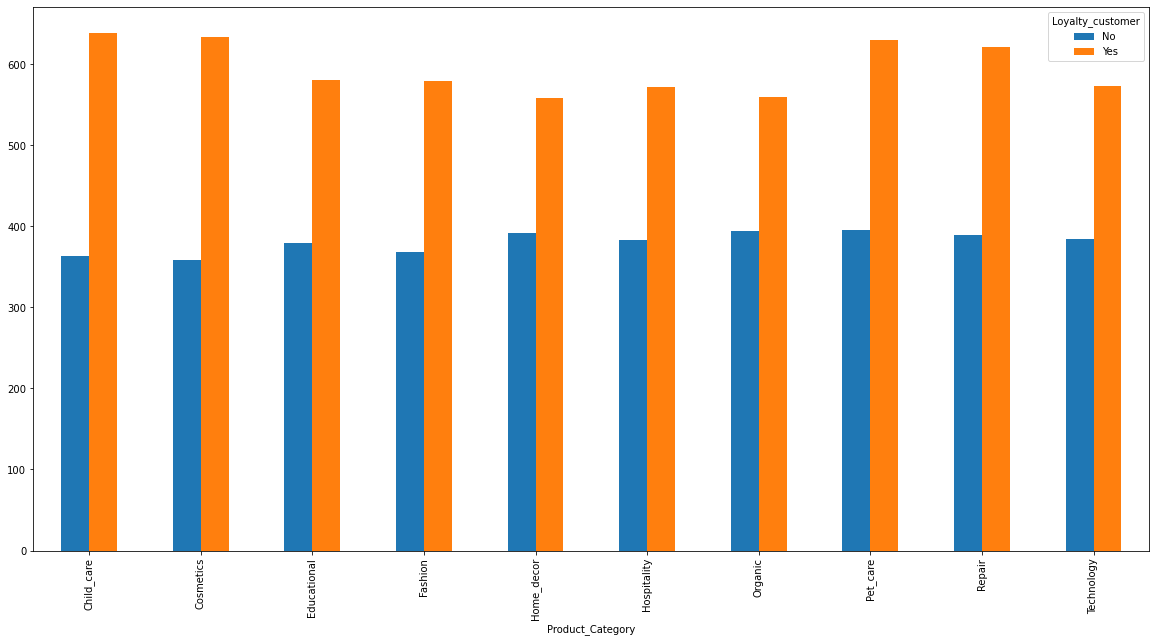

In [61]:
pd.crosstab(data["Product_Category"],data['Loyalty_customer']).tail(50).plot(kind = 'bar',  figsize=(20, 10))

In [62]:
data.pivot_table(values="Grade", index = "Market_Category", columns = "Product_Category").head(50)

Product_Category,Child_care,Cosmetics,Educational,Fashion,Home_decor,Hospitality,Organic,Pet_care,Repair,Technology
Market_Category,,,,,,,,,,
0,0.00000,0.000000,0.000000,0.400000,1.200000,0.00,0.000000,0.000000,0.0000,0.000000
1,0.00000,0.666667,0.000000,0.166667,0.000000,0.00,0.000000,0.000000,0.0000,0.000000
2,1.00000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.0000,1.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0000,0.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0000,NaN
6,1.00000,0.500000,0.000000,NaN,0.000000,1.00,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,0.000000,0.00,0.000000,NaN,NaN,NaN
8,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,3.000000,NaN,NaN,3.000000,3.00,3.000000,3.000000,3.0000,NaN


In [64]:
data[numerical_columns].isna().sum()

Stall_no             6
Market_Category      0
Grade                0
Demand               0
Discount_avail      37
charges_1          234
charges_2 (%)      209
Minimum_price       52
Maximum_price      341
dtype: int64

In [67]:
data["Stall_no"].fillna(data["Stall_no"].mode()[0])

0       37.0
1       38.0
2        9.0
3       50.0
4        7.0
        ... 
9752     9.0
9753    30.0
9754    14.0
9755     1.0
9756     3.0
Name: Stall_no, Length: 9757, dtype: float64

In [68]:
data["Stall_no"]=data["Stall_no"].fillna(data["Stall_no"].mode()[0])

In [69]:
data[numerical_columns].isna().sum()

Stall_no             0
Market_Category      0
Grade                0
Demand               0
Discount_avail      37
charges_1          234
charges_2 (%)      209
Minimum_price       52
Maximum_price      341
dtype: int64

In [71]:
data["Discount_avail"] = data["Discount_avail"].fillna(data["Discount_avail"].mode()[0])

In [72]:
data[numerical_columns].isna().sum()

Stall_no             0
Market_Category      0
Grade                0
Demand               0
Discount_avail       0
charges_1          234
charges_2 (%)      209
Minimum_price       52
Maximum_price      341
dtype: int64

In [73]:
data["charges_1"] = data["charges_1"].fillna(np.mean(data["charges_1"]))

In [74]:
data[numerical_columns].isna().sum()

Stall_no             0
Market_Category      0
Grade                0
Demand               0
Discount_avail       0
charges_1            0
charges_2 (%)      209
Minimum_price       52
Maximum_price      341
dtype: int64

In [75]:
data["charges_2 (%)"] = data["charges_2 (%)"].fillna(np.mean(data["charges_2 (%)"]))

In [76]:
data[numerical_columns].isna().sum()

Stall_no             0
Market_Category      0
Grade                0
Demand               0
Discount_avail       0
charges_1            0
charges_2 (%)        0
Minimum_price       52
Maximum_price      341
dtype: int64

In [77]:
data["Minimum_price"] = data["Minimum_price"].fillna(np.mean(data["Minimum_price"]))

In [78]:
data["Maximum_price"] = data["Maximum_price"].fillna(np.mean(data["Maximum_price"]))

In [79]:
 data[numerical_columns].isna().sum()

Stall_no           0
Market_Category    0
Grade              0
Demand             0
Discount_avail     0
charges_1          0
charges_2 (%)      0
Minimum_price      0
Maximum_price      0
dtype: int64

In [80]:
numerical_columns , category_columns

(Index(['Stall_no', 'Market_Category', 'Grade', 'Demand', 'Discount_avail',
        'charges_1', 'charges_2 (%)', 'Minimum_price', 'Maximum_price'],
       dtype='object'),
 Index(['Loyalty_customer', 'Product_Category'], dtype='object'))

In [81]:
processed_numerical_col = data.select_dtypes(include=np.number)

In [82]:
processed_numerical_col

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,37.0,2,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,38.0,24,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,9.0,447,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,50.0,23,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,7.0,63,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...
9752,9.0,58,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN
9753,30.0,358,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN
9754,14.0,106,0,36,0.0,150.0,17.0,710.0,10894.0,NaN
9755,1.0,104,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN


In [94]:
 data[category_columns].isna().sum()

Loyalty_customer    0
Product_Category    0
dtype: int64

In [95]:
pd.get_dummies(data.select_dtypes(exclude=np.number).drop(columns=['Product_id','instock_date','Customer_name']))

,Loyalty_customer_No,Loyalty_customer_Yes,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology
0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9752,0,1,0,0,0,0,0,0,0,1,0,0
9753,0,1,0,0,0,0,0,0,0,0,0,1
9754,0,1,0,0,1,0,0,0,0,0,0,0
9755,0,1,1,0,0,0,0,0,0,0,0,0


In [100]:
processed_category_col =pd.get_dummies(data.select_dtypes(exclude=np.number).drop(columns=['Product_id','instock_date','Customer_name']))

In [101]:
processed_category_col.head()

,Loyalty_customer_No,Loyalty_customer_Yes,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology
0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0


In [102]:
scale = StandardScaler()

In [103]:
pd.DataFrame(scale.fit_transform(processed_numerical_col.drop(columns="Selling_Price")),columns=processed_numerical_col.drop(columns="Selling_Price").columns)

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,0.806981,-1.155956,0.336652,0.602814,-0.406391,0.900658,0.175721,-0.237915,-0.457870
1,0.876679,-1.026374,-0.631719,0.014897,-0.406391,1.070979,0.411432,1.829262,1.107416
2,-1.144580,1.465136,-0.631719,-1.403020,-0.406391,-0.121271,-0.295700,1.030705,0.262733
3,1.713062,-1.032264,1.305023,-0.088853,-0.406391,-0.980988,0.647143,0.727409,4.011479
4,-1.283977,-0.796660,0.336652,-0.538436,2.460681,-0.437582,-1.474253,-0.491272,0.804574
...,...,...,...,...,...,...,...,...,...
9752,-1.144580,-0.826111,-0.631719,-0.400103,-0.406391,-1.199973,-1.238542,-0.187060,-0.468695
9753,0.319091,0.940917,2.273394,-1.160936,-0.406391,1.979360,-1.002832,-0.054196,2.149181
9754,-0.796087,-0.543386,-0.631719,-0.503853,-0.406391,-0.932325,1.589985,-1.279291,1.257865
9755,-1.702169,-0.555167,-0.631719,0.429898,-0.406391,0.487020,1.118564,-0.927890,-0.332403


In [104]:
preprocessed_data = pd.concat([processed_category_col,processed_numerical_col],axis = 1)

In [105]:
preprocessed_data

,Loyalty_customer_No,Loyalty_customer_Yes,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,...,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,0,1,0,0,0,1,0,0,0,0,...,37.0,2,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,0,1,0,0,0,1,0,0,0,0,...,38.0,24,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,0,1,1,0,0,0,0,0,0,0,...,9.0,447,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,0,1,0,0,1,0,0,0,0,0,...,50.0,23,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,0,1,0,0,0,0,0,0,0,0,...,7.0,63,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9752,0,1,0,0,0,0,0,0,0,1,...,9.0,58,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN
9753,0,1,0,0,0,0,0,0,0,0,...,30.0,358,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN
9754,0,1,0,0,1,0,0,0,0,0,...,14.0,106,0,36,0.0,150.0,17.0,710.0,10894.0,NaN
9755,0,1,1,0,0,0,0,0,0,0,...,1.0,104,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN


In [106]:
train_preprocessed = preprocessed_data[preprocessed_data['Selling_Price'].notna()]

In [107]:
train_preprocessed

,Loyalty_customer_No,Loyalty_customer_Yes,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,...,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,0,1,0,0,0,1,0,0,0,0,...,37.0,2,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,0,1,0,0,0,1,0,0,0,0,...,38.0,24,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,0,1,1,0,0,0,0,0,0,0,...,9.0,447,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,0,1,0,0,1,0,0,0,0,0,...,50.0,23,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,0,1,0,0,0,0,0,0,0,0,...,7.0,63,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6322,0,1,0,0,0,0,0,0,0,0,...,17.0,24,0,47,0.0,614.0,10.0,8174.0,11266.0,10277.520192
6323,0,1,1,0,0,0,0,0,0,0,...,21.0,55,0,35,0.0,269.0,5.0,3564.0,4920.0,4501.837200
6324,1,0,0,0,0,0,0,0,0,0,...,36.0,358,3,29,0.0,283.0,3.0,5303.0,14614.0,10218.878775
6325,0,1,0,0,0,0,0,0,0,0,...,27.0,452,0,8,0.0,267.0,3.0,4334.0,5849.0,5359.493997


In [108]:
test_preprocessed = preprocessed_data[preprocessed_data['Selling_Price'].isna()]

In [109]:
test_preprocessed

,Loyalty_customer_No,Loyalty_customer_Yes,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,...,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
6327,1,0,0,0,0,1,0,0,0,0,...,39.0,205,0,90,0.0,380.0,16.0,2576.0,3340.0,NaN
6328,0,1,0,0,0,1,0,0,0,0,...,49.0,3,0,87,0.0,393.0,16.0,1202.0,1955.0,NaN
6329,1,0,0,0,0,0,0,0,0,0,...,1.0,183,2,55,0.0,493.0,9.0,7175.0,15715.0,NaN
6330,0,1,1,0,0,0,0,0,0,0,...,8.0,358,3,86,0.0,303.0,16.0,5404.0,13078.0,NaN
6331,1,0,0,0,0,0,0,0,0,0,...,33.0,167,0,27,0.0,567.0,16.0,4069.0,6244.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9752,0,1,0,0,0,0,0,0,0,1,...,9.0,58,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN
9753,0,1,0,0,0,0,0,0,0,0,...,30.0,358,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN
9754,0,1,0,0,1,0,0,0,0,0,...,14.0,106,0,36,0.0,150.0,17.0,710.0,10894.0,NaN
9755,0,1,1,0,0,0,0,0,0,0,...,1.0,104,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN


In [110]:
train_preprocessed.to_csv("train_preprocessed.csv", index = False)
test_preprocessed.to_csv("test_preprocessed.csv", index = False)